In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.XGBoost_Model_Module import Xgboost_model
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation, predict

In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Italy/Veneto/Anopheles/IT_veneto_anopheles_2010_2022.csv')
columns = ['dt_placement', 'x', 'y', 'anopheles_total', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
names = ['dt_placement', 'x', 'y', 'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/Italy_veneto_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/Italy_veneto_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type',
       'anopheles zacharovi', 'anopheles maculipenis', 'anopheles_total',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7'

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'Anopheles Italy'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Results/Anopheles Italy/'
# set the name of the sdate column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions of the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = []

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, 10, dropna=True)

Bounds: [    1.      2.     16.     48.     98.    195.    318.    500.8   772.8
  1300.  13398. ]


In [7]:
model = Xgboost_model(model_type = model_type, learning_rate = 0.2,
                      embedding_data = embedded_data,  transformation_list = transformation_list,
                      early_stop = False, l1_weight = 0, l2_weight = 0, weights = False)

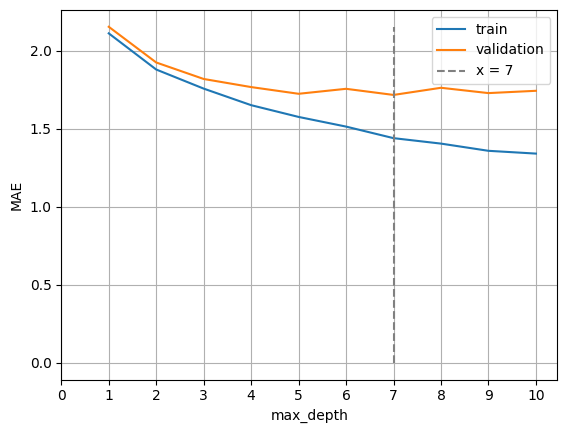

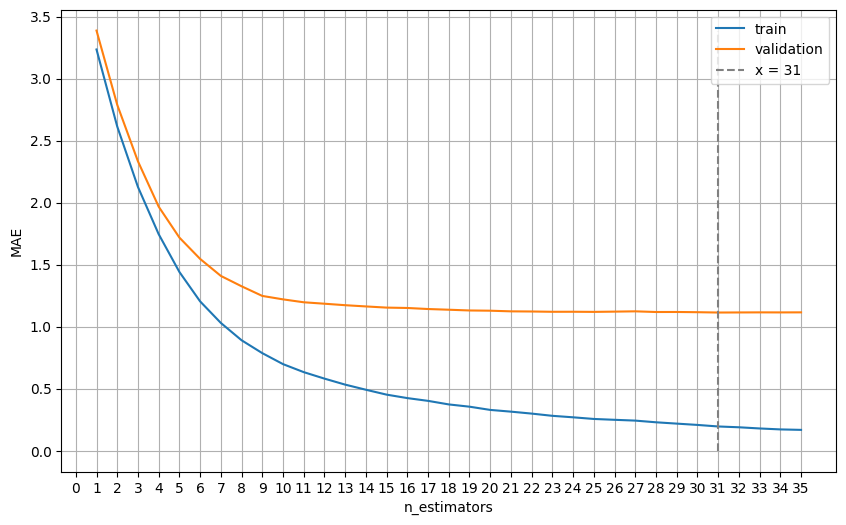

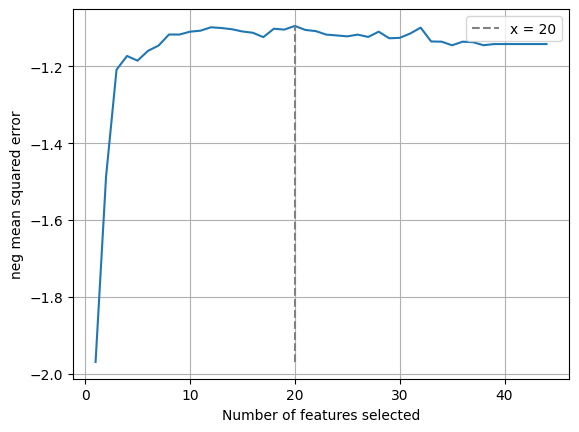

max_depth:  7
Number of estimators:  31
Selected_features:  Index(['y', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
       'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean',
       'lst_apr_night_mean', 'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER',
       'SLOPE_mean_1km', 'ASPECT_mean_200m', 'ELEVATION_mean_1km',
       'HILLSHADE_mean_1km', 'FS_AREA_1km', 'FLOW_ACCU_200m',
       'null_island_distance', 'days_distance', 'mo_cos', 'year'],
      dtype='object')


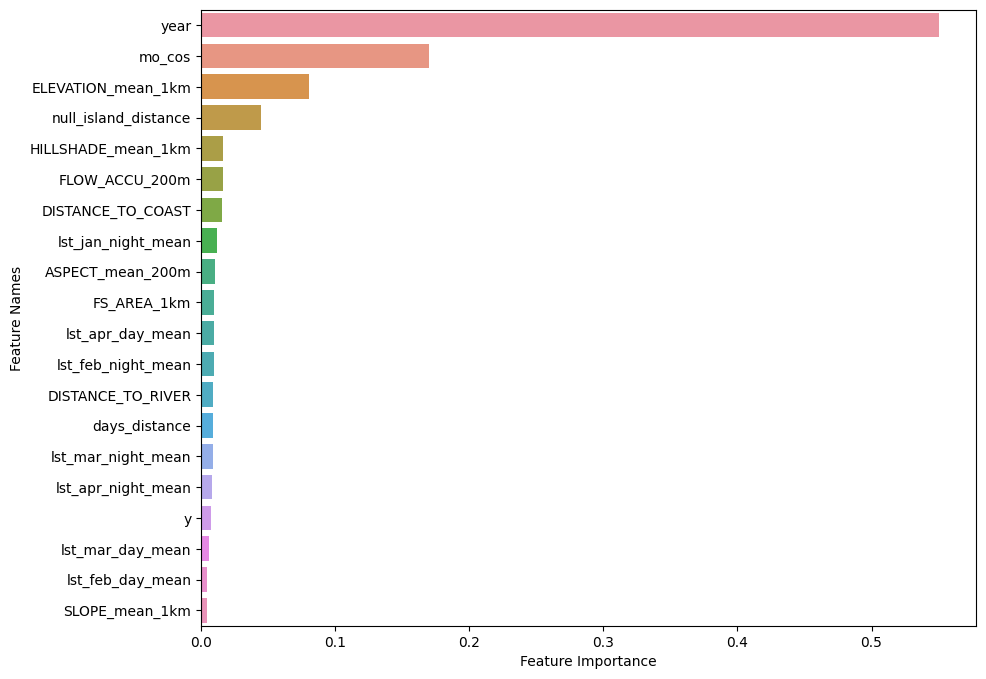

MAE on train set:  0.29783393501805056
min prediction: 0.0
max prediction: 9.0

MAE on test set:  0.9516728624535316
Error <= 3: 99.26 %
min prediction: -0.0
max prediction: 9.0


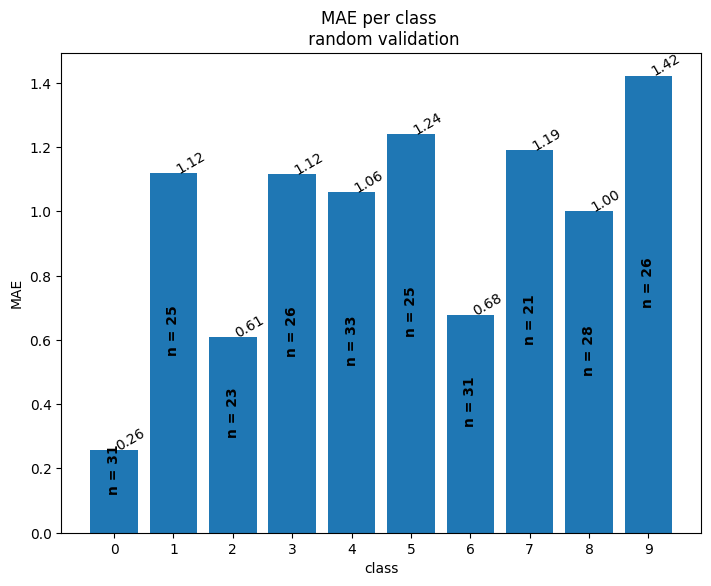

-----------|class error-MAE| difference-----------
mean: 0.4537045918083787
std: 0.33204322799841635
coefficient of variation (std/mean): 0.7318489475166128

----------normalized difference-------------
mean: 0.38944185409750076
std: 0.28501261104017417
coefficient of variation (std/mean): 0.7318489475166127


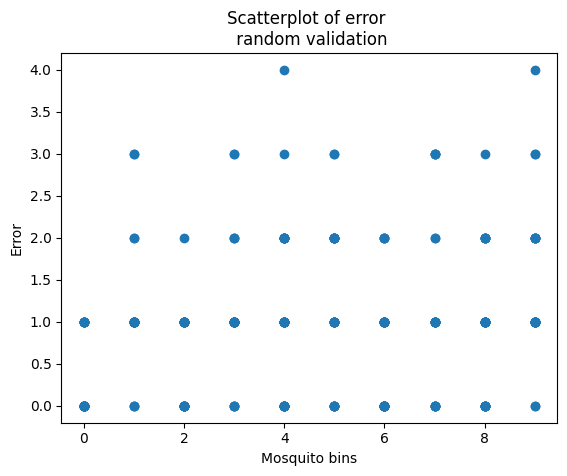

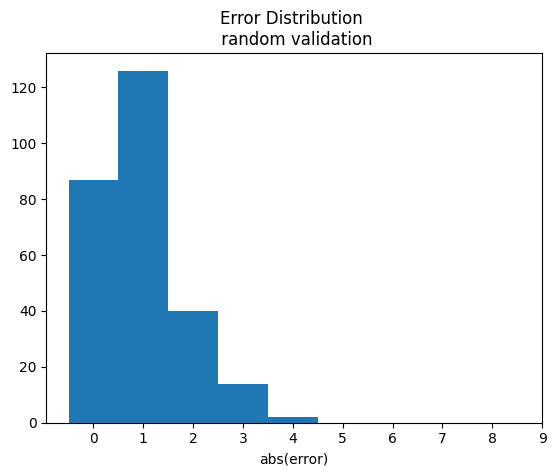

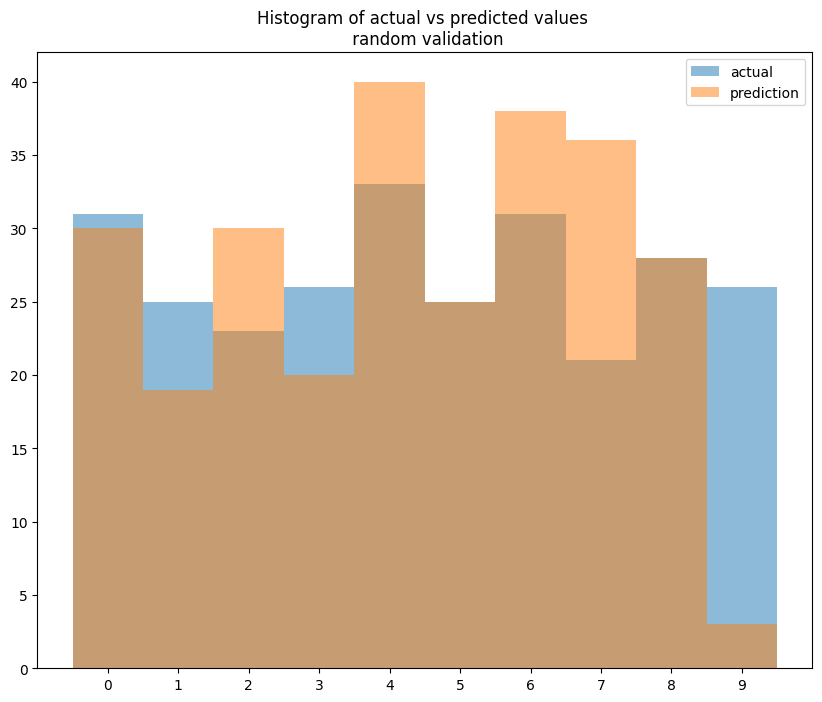

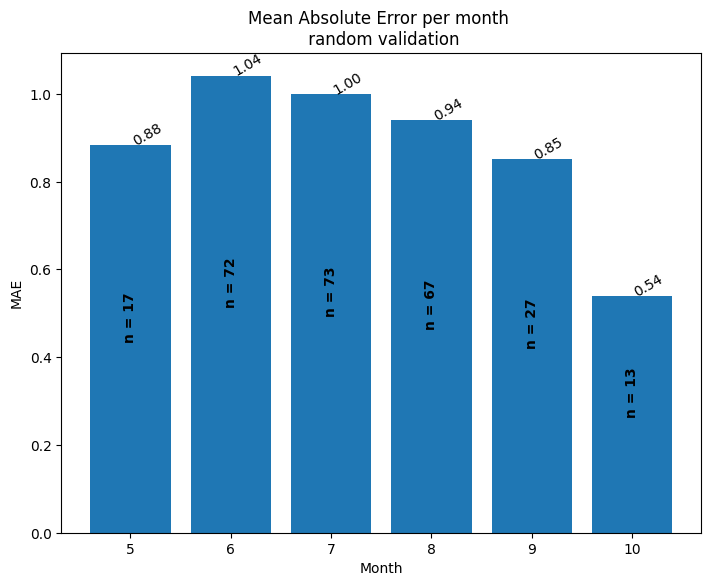

In [8]:
test_model_random_split(data, model, filepath = '', date_col = date_col, case='', fi = True, export=exp)

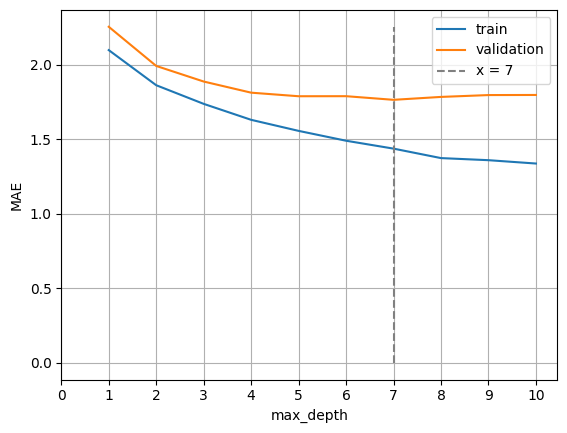

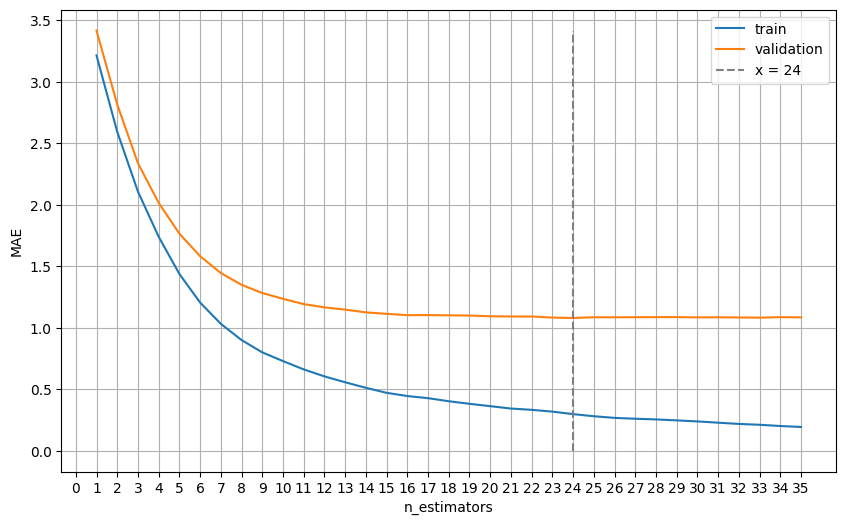

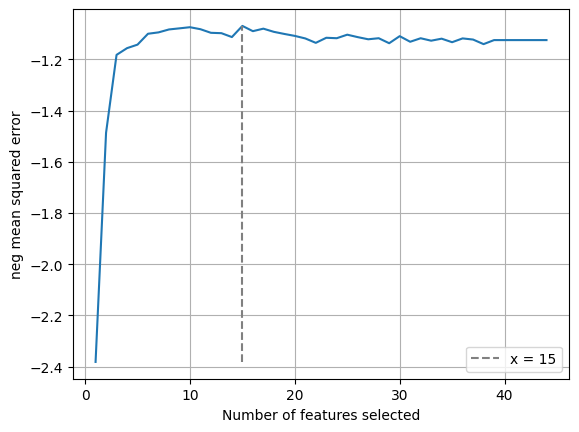

max_depth:  7
Number of estimators:  24
Selected_features:  Index(['y', 'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean',
       'lst_apr_night_mean', 'DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER',
       'ASPECT_mean_200m', 'ELEVATION_mean_1km', 'HILLSHADE_mean_1km',
       'FLOW_ACCU_200m', 'null_island_distance', 'days_distance', 'mo_cos',
       'year'],
      dtype='object')
MAE on train set:  0.36527984150569587
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.0230312035661218
Error <= 3: 98.07 %
min prediction: -0.0
max prediction: 9.0


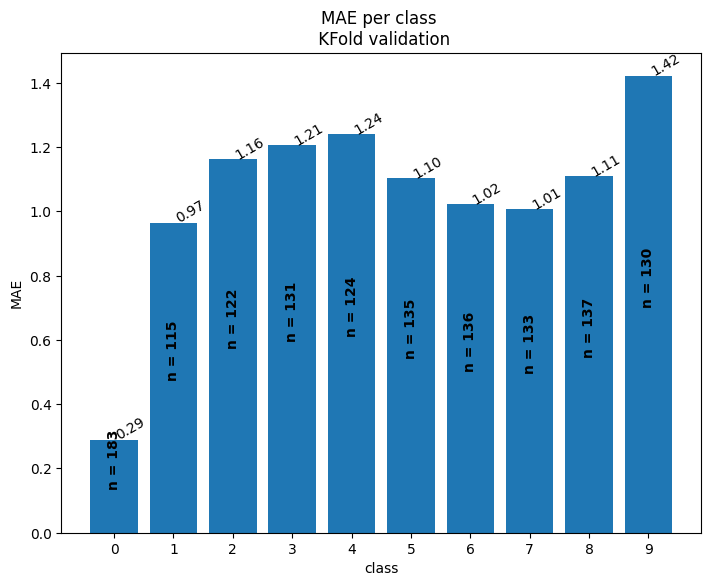

-----------|class error-MAE| difference-----------
mean: 0.3698110274399192
std: 0.28419138321443055
coefficient of variation (std/mean): 0.7684773090240021

----------normalized difference-------------
mean: 0.32626754469852315
std: 0.2507292047717894
coefficient of variation (std/mean): 0.7684773090240021


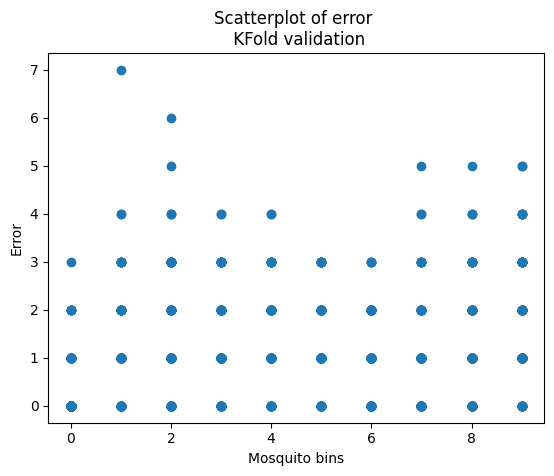

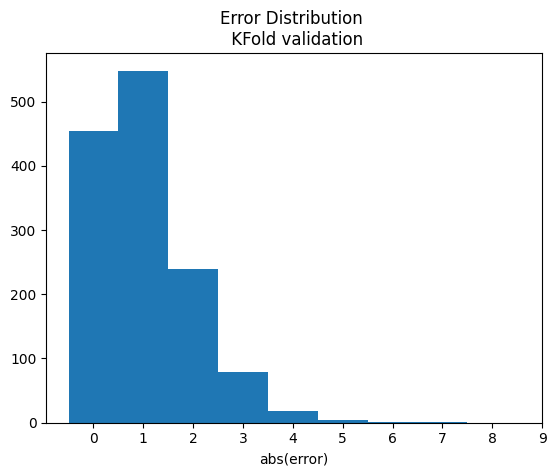

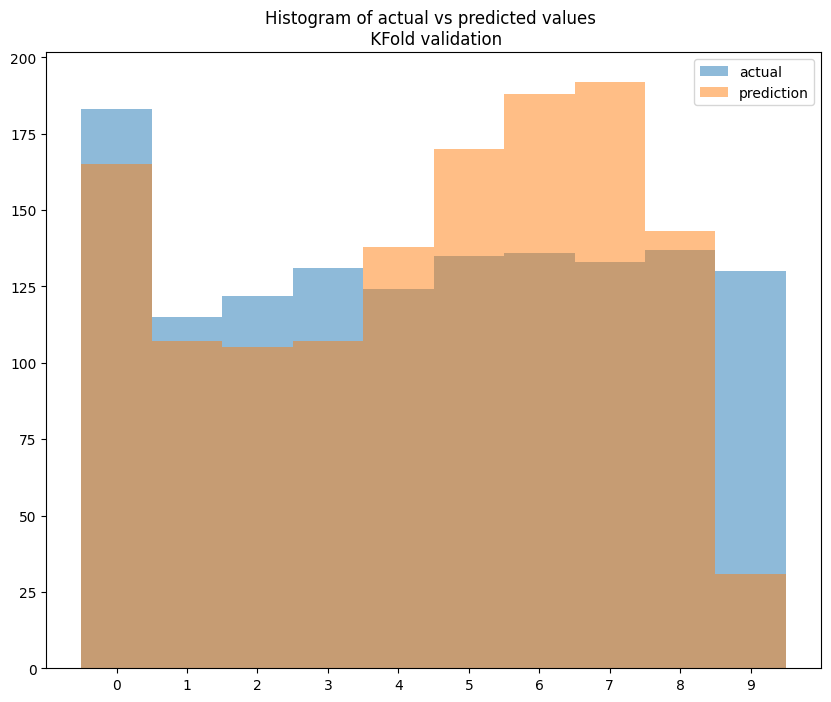

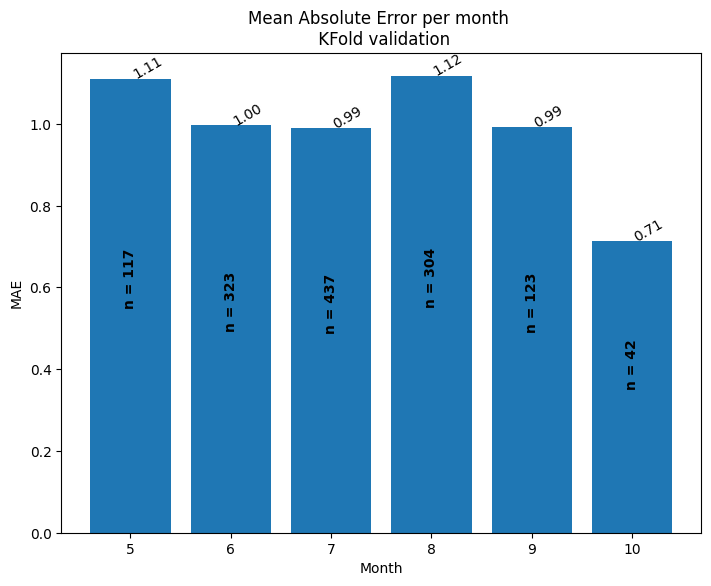

In [9]:
train_model_KFold(data, model, date_col=date_col)

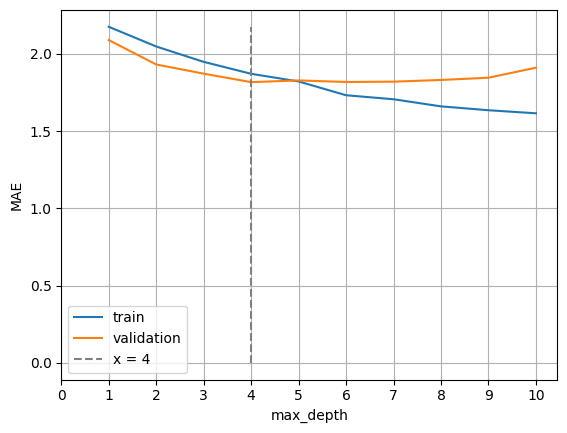

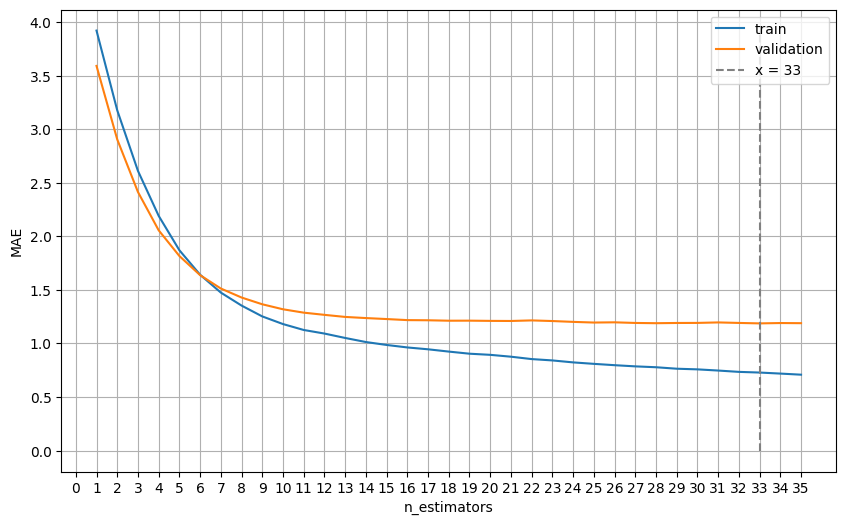

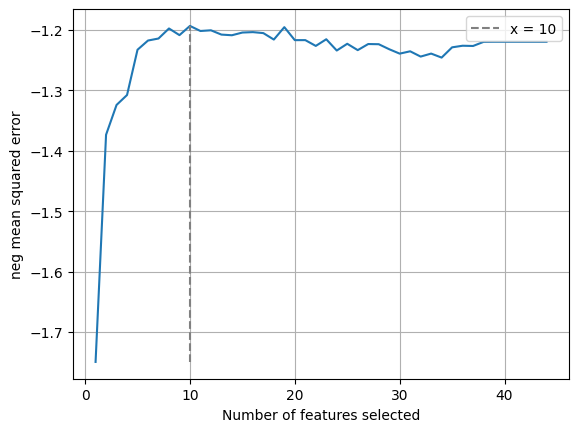

max_depth:  4
Number of estimators:  33
Selected_features:  Index(['y', 'DISTANCE_TO_COAST', 'ASPECT_mean_200m', 'ELEVATION_mean_1km',
       'HILLSHADE_mean_1km', 'FLOW_ACCU_200m', 'null_island_distance',
       'days_distance', 'mo_cos', 'year'],
      dtype='object')
2021
MAE on train set:  0.857795545402627
min prediction: 0.0
max prediction: 9.0

MAE on test set:  1.9603174603174602
Error <= 3: 80.95 %
min prediction: 0.0
max prediction: 7.0


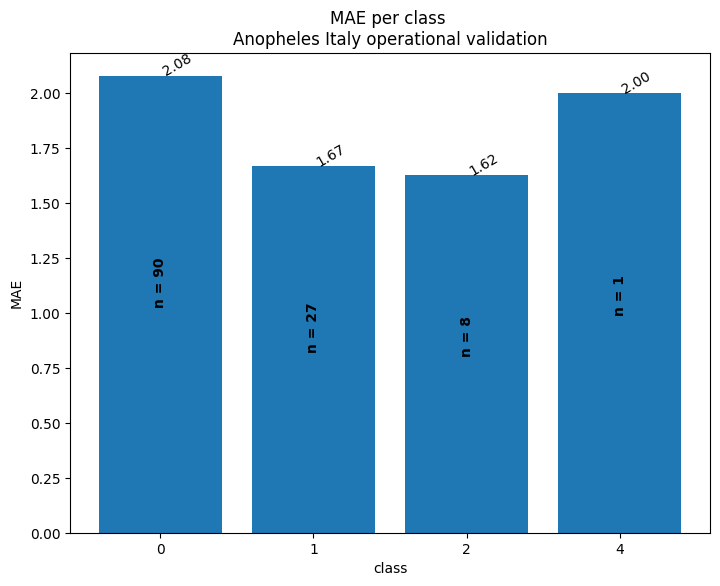

-----------|class error-MAE| difference-----------
mean: 0.1965277777777778
std: 0.16069600498618036
coefficient of variation (std/mean): 0.8176757850886915

----------normalized difference-------------
mean: 0.5240740740740741
std: 0.42852267996314763
coefficient of variation (std/mean): 0.8176757850886915


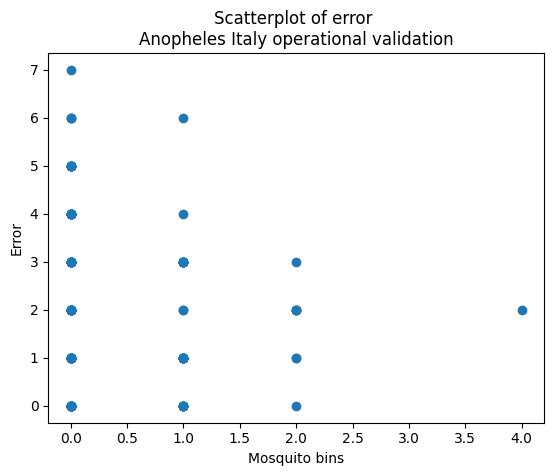

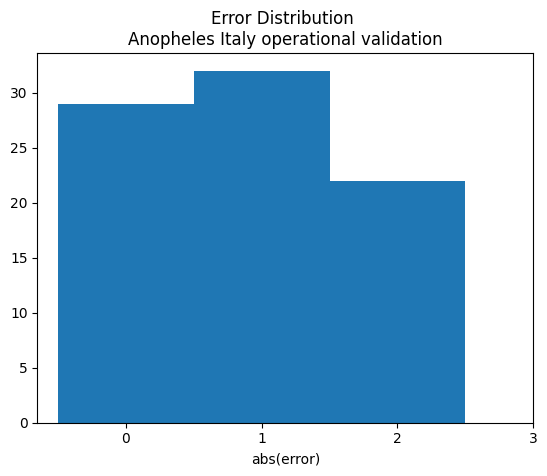

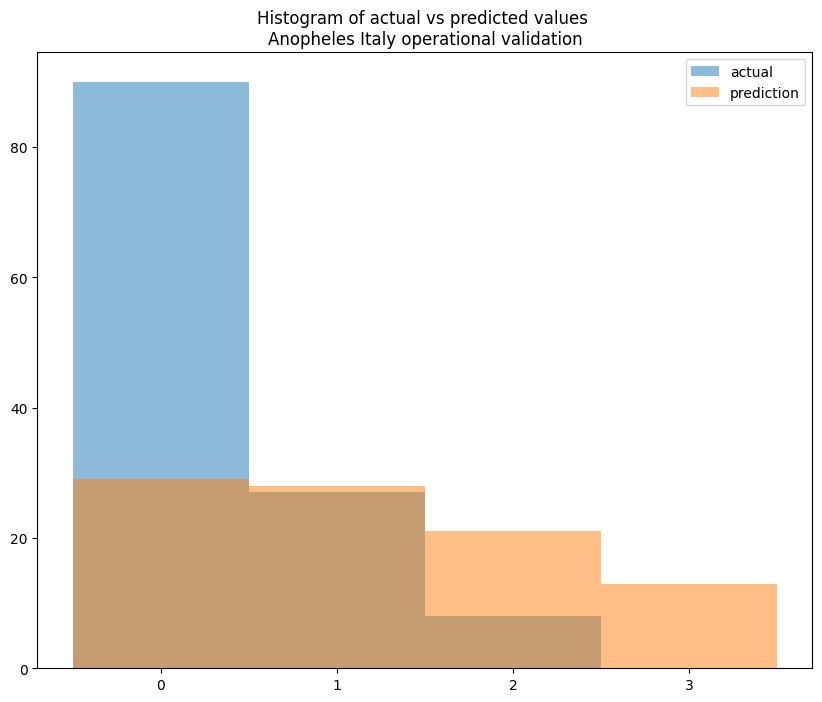

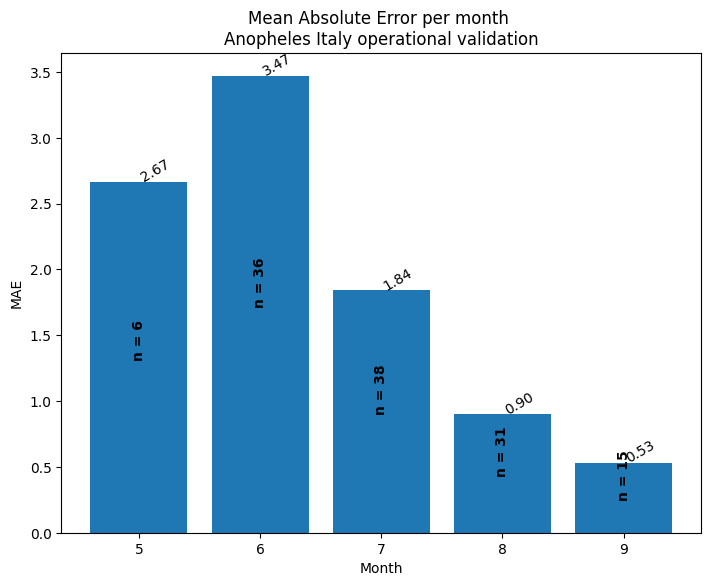

2022
MAE on train set:  0.857795545402627
min prediction: 0.0
max prediction: 9.0

MAE on test set:  0.425
Error <= 3: 100.00 %
min prediction: -0.0
max prediction: 3.0


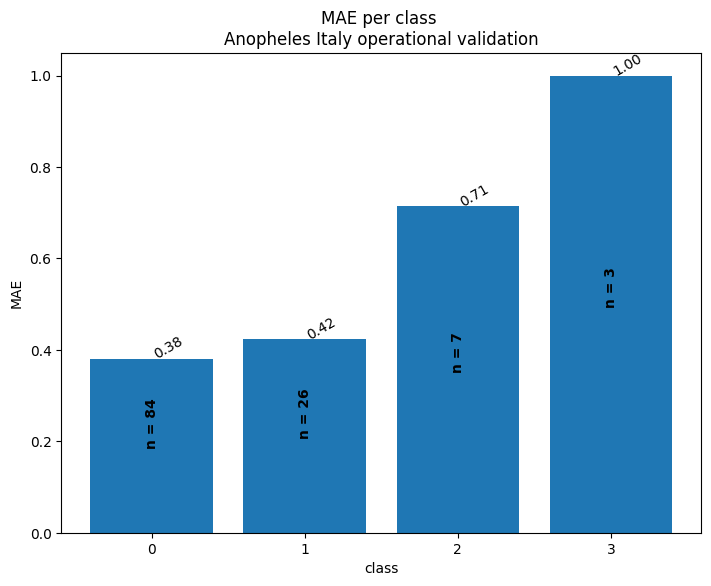

-----------|class error-MAE| difference-----------
mean: 0.37042124542124544
std: 0.24942195580904408
coefficient of variation (std/mean): 0.6733467879937605

----------normalized difference-------------
mean: 0.5983727810650887
std: 0.4029123901530712
coefficient of variation (std/mean): 0.6733467879937605


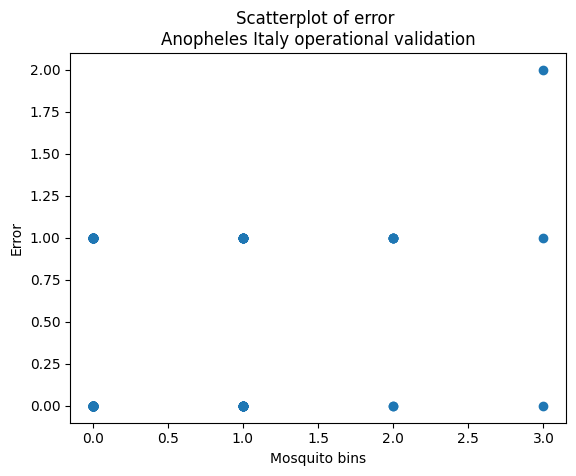

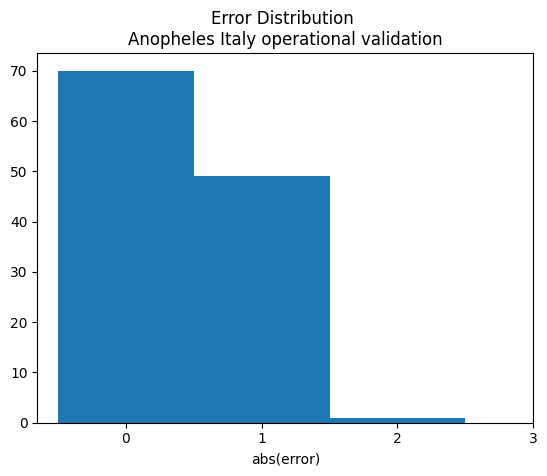

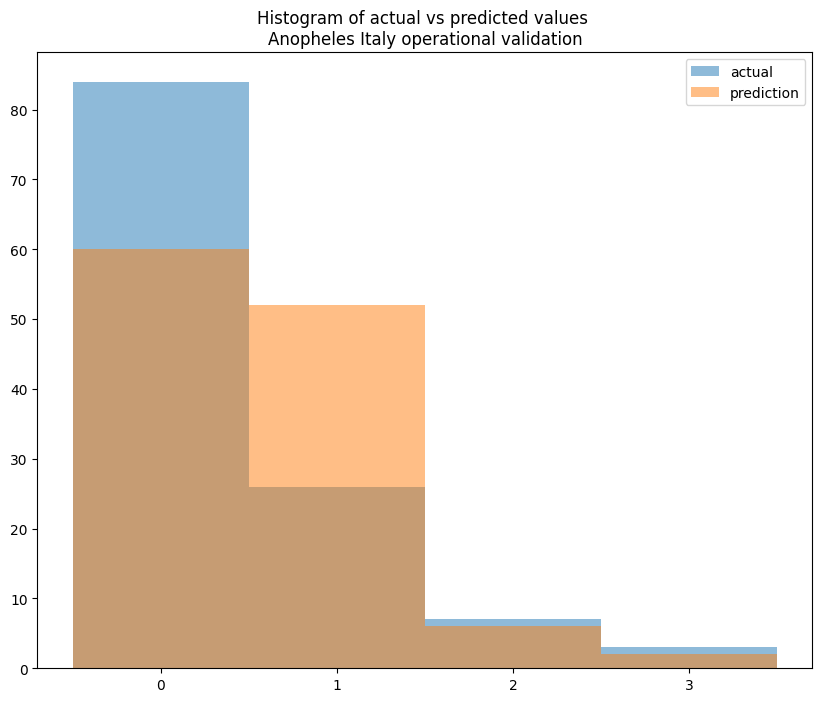

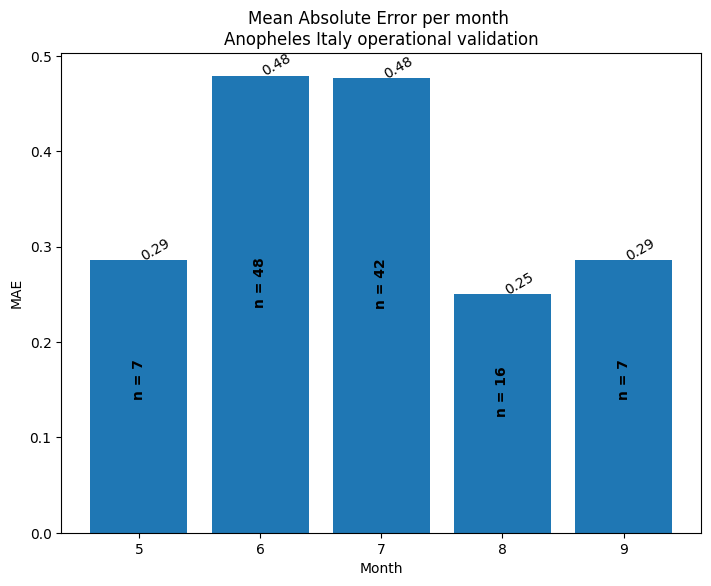

In [10]:
operational_validation(data, model, filepath = path, date_col = date_col,
                       date = '2021-01-01', case = case_title, export= exp)